In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Baseline CNN model
baseline_model = Sequential()
baseline_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
baseline_model.add(MaxPooling2D((2, 2)))
baseline_model.add(Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(MaxPooling2D((2, 2)))
baseline_model.add(Flatten())
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(Dense(10, activation='softmax'))

# Compile the baseline model
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [5]:
# Augmented CNN model
augmented_model = Sequential()
augmented_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
augmented_model.add(MaxPooling2D((2, 2)))
augmented_model.add(Conv2D(64, (3, 3), activation='relu'))
augmented_model.add(MaxPooling2D((2, 2)))
augmented_model.add(Flatten())
augmented_model.add(Dense(128, activation='relu'))
augmented_model.add(Dense(10, activation='softmax'))

# Compile the augmented model
augmented_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
augmented_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 46s 36ms/step - loss: 1.4741 - accuracy: 0.4733 - val_loss: 1.2252 - val_accuracy: 0.5794
Epoch 2/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.1241 - accuracy: 0.6045 - val_loss: 1.1129 - val_accuracy: 0.6057
Epoch 3/10
1250/1250 [==============================] - 43s 35ms/step - loss: 0.9734 - accuracy: 0.6600 - val_loss: 0.9974 - val_accuracy: 0.6517
Epoch 4/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8697 - accuracy: 0.6963 - val_loss: 0.9479 - val_accuracy: 0.6723
Epoch 5/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.7777 - accuracy: 0.7300 - val_loss: 0.9185 - val_accuracy: 0.6848
Epoch 6/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.6970 - accuracy: 0.7558 - val_loss: 0.9254 - val_accuracy: 0.6814
Epoch 7/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.6245 - accuracy: 0.7812 - val_loss: 0.9463 -

In [8]:
import os
import shutil

cifar_root = "cifar-10-data"
if not os.path.exists(cifar_root):
    os.mkdir(cifar_root)

# Create subdirectories for training and testing datasets
train_path = os.path.join(cifar_root, "train")
test_path = os.path.join(cifar_root, "test")

if not os.path.exists(train_path):
    os.mkdir(train_path)

if not os.path.exists(test_path):
    os.mkdir(test_path)

# Create subdirectories for each class label in both training and testing datasets
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for label in class_labels:
    train_label_path = os.path.join(train_path, label)
    test_label_path = os.path.join(test_path, label)
    
    if not os.path.exists(train_label_path):
        os.mkdir(train_label_path)
        
    if not os.path.exists(test_label_path):
        os.mkdir(test_label_path)

In [9]:
import cv2

# Save the "training" images in the corresponding folders based on their class (or label)
for i in range(len(x_train)):
    fname = "img-" + str(i) + ".jpg"
    class_label = class_labels[int(y_train[i][0])]  # Convert to integer
    cv2.imwrite(os.path.join(train_path, class_label, fname), x_train[i])

# Save the "testing" images in the corresponding folders based on their class (or label)
for i in range(len(x_test)):
    fname = "img-" + str(i) + ".jpg"
    class_label = class_labels[int(y_test[i][0])]  # Convert to integer
    cv2.imwrite(os.path.join(test_path, class_label, fname), x_test[i])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set your directory paths for training and testing datasets
train_path = "cifar-10-data/train"  # Update with your training data directory path
test_path = "cifar-10-data/test"  # Update with your testing data directory path

# Create an ImageDataGenerator for the training images with desired transformations
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.20
)

# Create an ImageDataGenerator for the testing images
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Define batch size
batch_size = 32

# Create iterators for training and validation data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical',  # Set to 'categorical' if you have multiple classes
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = datagen.flow_from_directory(
    train_path,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Create an iterator for the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)


Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [11]:
# Training the augmented model with data augmentation
#augmented_history = augmented_model.fit(train_generator, epochs=10, validation_data=test_generator)
augmented_history = augmented_model.fit(train_generator,epochs=10,validation_data = valid_generator)

Epoch 1/10
1250/1250 [==============================] - 224s 178ms/step - loss: 0.3268 - accuracy: 0.8993 - val_loss: 0.2903 - val_accuracy: 0.9002
Epoch 2/10
1250/1250 [==============================] - 241s 193ms/step - loss: 0.2884 - accuracy: 0.9024 - val_loss: 0.2753 - val_accuracy: 0.9039
Epoch 3/10
1250/1250 [==============================] - 215s 172ms/step - loss: 0.2766 - accuracy: 0.9039 - val_loss: 0.2668 - val_accuracy: 0.9065
Epoch 4/10
1250/1250 [==============================] - 220s 176ms/step - loss: 0.2646 - accuracy: 0.9060 - val_loss: 0.2625 - val_accuracy: 0.9080
Epoch 5/10
1250/1250 [==============================] - 125s 100ms/step - loss: 0.2558 - accuracy: 0.9065 - val_loss: 0.2524 - val_accuracy: 0.9102
Epoch 6/10
1250/1250 [==============================] - 171s 137ms/step - loss: 0.2503 - accuracy: 0.9087 - val_loss: 0.2554 - val_accuracy: 0.9062
Epoch 7/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.2471 - accuracy: 0.9096 - val_

In [12]:
# Evaluate both models on the test data
baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(x_test, y_test)
augmented_test_loss, augmented_test_accuracy = augmented_model.evaluate(test_generator)

print("Baseline Model - Test Loss:", baseline_test_loss)
print("Baseline Model - Test Accuracy:", baseline_test_accuracy)
print("Augmented Model - Test Loss:", augmented_test_loss)
print("Augmented Model - Test Accuracy:", augmented_test_accuracy)

313/313 [==============================] - 28s 89ms/step - loss: 0.2326 - accuracy: 0.9147
Baseline Model - Test Loss: 1.0421472787857056
Baseline Model - Test Accuracy: 0.6916000247001648
Augmented Model - Test Loss: 0.23256054520606995
Augmented Model - Test Accuracy: 0.9146999716758728


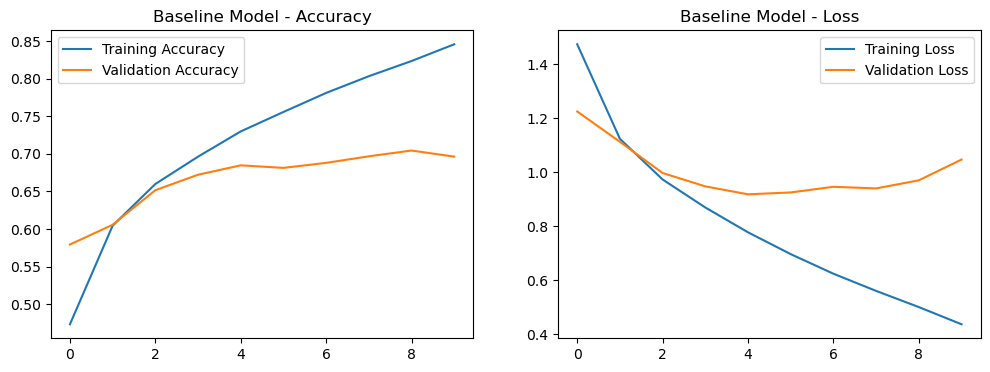

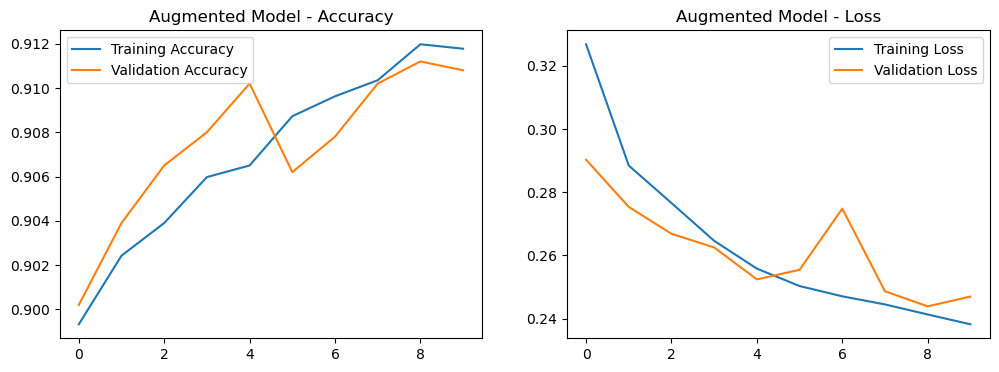

In [13]:
# Plot training and validation accuracy and loss for both models
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')

    plt.subplot(122)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(title + ' - Loss')

plot_history(baseline_history, "Baseline Model")
plot_history(augmented_history, "Augmented Model")

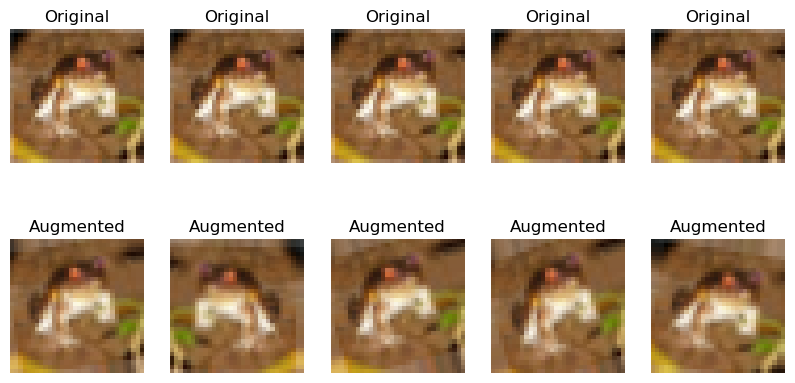

In [14]:
# Data Augmentation Visualization (Show original and augmented images)
augmented_images = [datagen.random_transform(x_train[0]) for _ in range(5)]

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[0])
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(augmented_images[i])
    plt.title("Augmented")
    plt.axis('off')

plt.show()